<a href="https://colab.research.google.com/github/H-y-hoon/Python_Programming3/blob/main/Data_analysis_assignment(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###2조

**함양훈(202104397)**

**정하은(202104343)**

In [ ]:
#구글 드라이브와 mount(연결)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#library
import pandas as pd
import numpy as np

normal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/train_data.csv')
abnormal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/test_data.csv')

 - normal: no outlier

 - abnormal: there is an outlier

#**Data compute**

In [ ]:
normal.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
abnormal.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [ ]:
normal.isnull().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [ ]:
abnormal.isnull().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

- confirm no missing values

In [ ]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [ ]:
abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-null   float64
 5   motor_temp     7389 non-null   float64
 6   motor_vibe     7389 non-null   float64
 7   type           7389 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 461.9 KB


type => 비연속형

type 제외한 나머지 데이터 => 연속형

In [ ]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,2463.0,2.128843,1.202328e+00,0.33,1.28,1.96,2.820,6.22
air_end_temp,2463.0,49.001137,8.725091e+00,32.03,41.60,48.98,56.355,64.96
out_pressure,2463.0,0.700000,1.110448e-16,0.70,0.70,0.70,0.700,0.70
motor_current,2463.0,27.490715,1.360460e+01,5.34,17.11,25.85,36.000,72.00
motor_rpm,2463.0,2372.576939,6.878708e+02,1201.00,1784.50,2358.00,2971.000,3564.00
motor_temp,2463.0,65.766707,7.797152e+00,50.36,59.15,65.64,72.275,80.52
motor_vibe,2463.0,3.452972,1.576386e+00,1.97,2.88,3.26,3.730,21.87
type,2463.0,2.957369,2.230113e+00,0.00,1.00,3.00,5.000,7.00


In [ ]:

abnormal.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,7389.0,2.103129,1.163998,0.34,1.28,1.94,2.77,6.24
air_end_temp,7389.0,49.042735,8.686208,32.08,41.51,48.76,56.58,65.54
out_pressure,7389.0,0.699840,0.005377,0.49,0.70,0.70,0.70,0.70
motor_current,7389.0,27.417935,13.234089,5.37,17.20,26.17,35.86,74.00
motor_rpm,7389.0,2373.820003,687.737182,1200.00,1774.00,2355.00,2972.00,3564.00
motor_temp,7389.0,65.771623,7.741473,50.42,59.11,65.52,72.44,82.39
motor_vibe,7389.0,3.345523,0.644199,1.97,2.89,3.26,3.73,6.26
type,7389.0,2.957369,2.229811,0.00,1.00,3.00,5.00,7.00


- difficult to check abnormal values ​​with one data frame
> Therefore, compare the figures by dividing them by type.


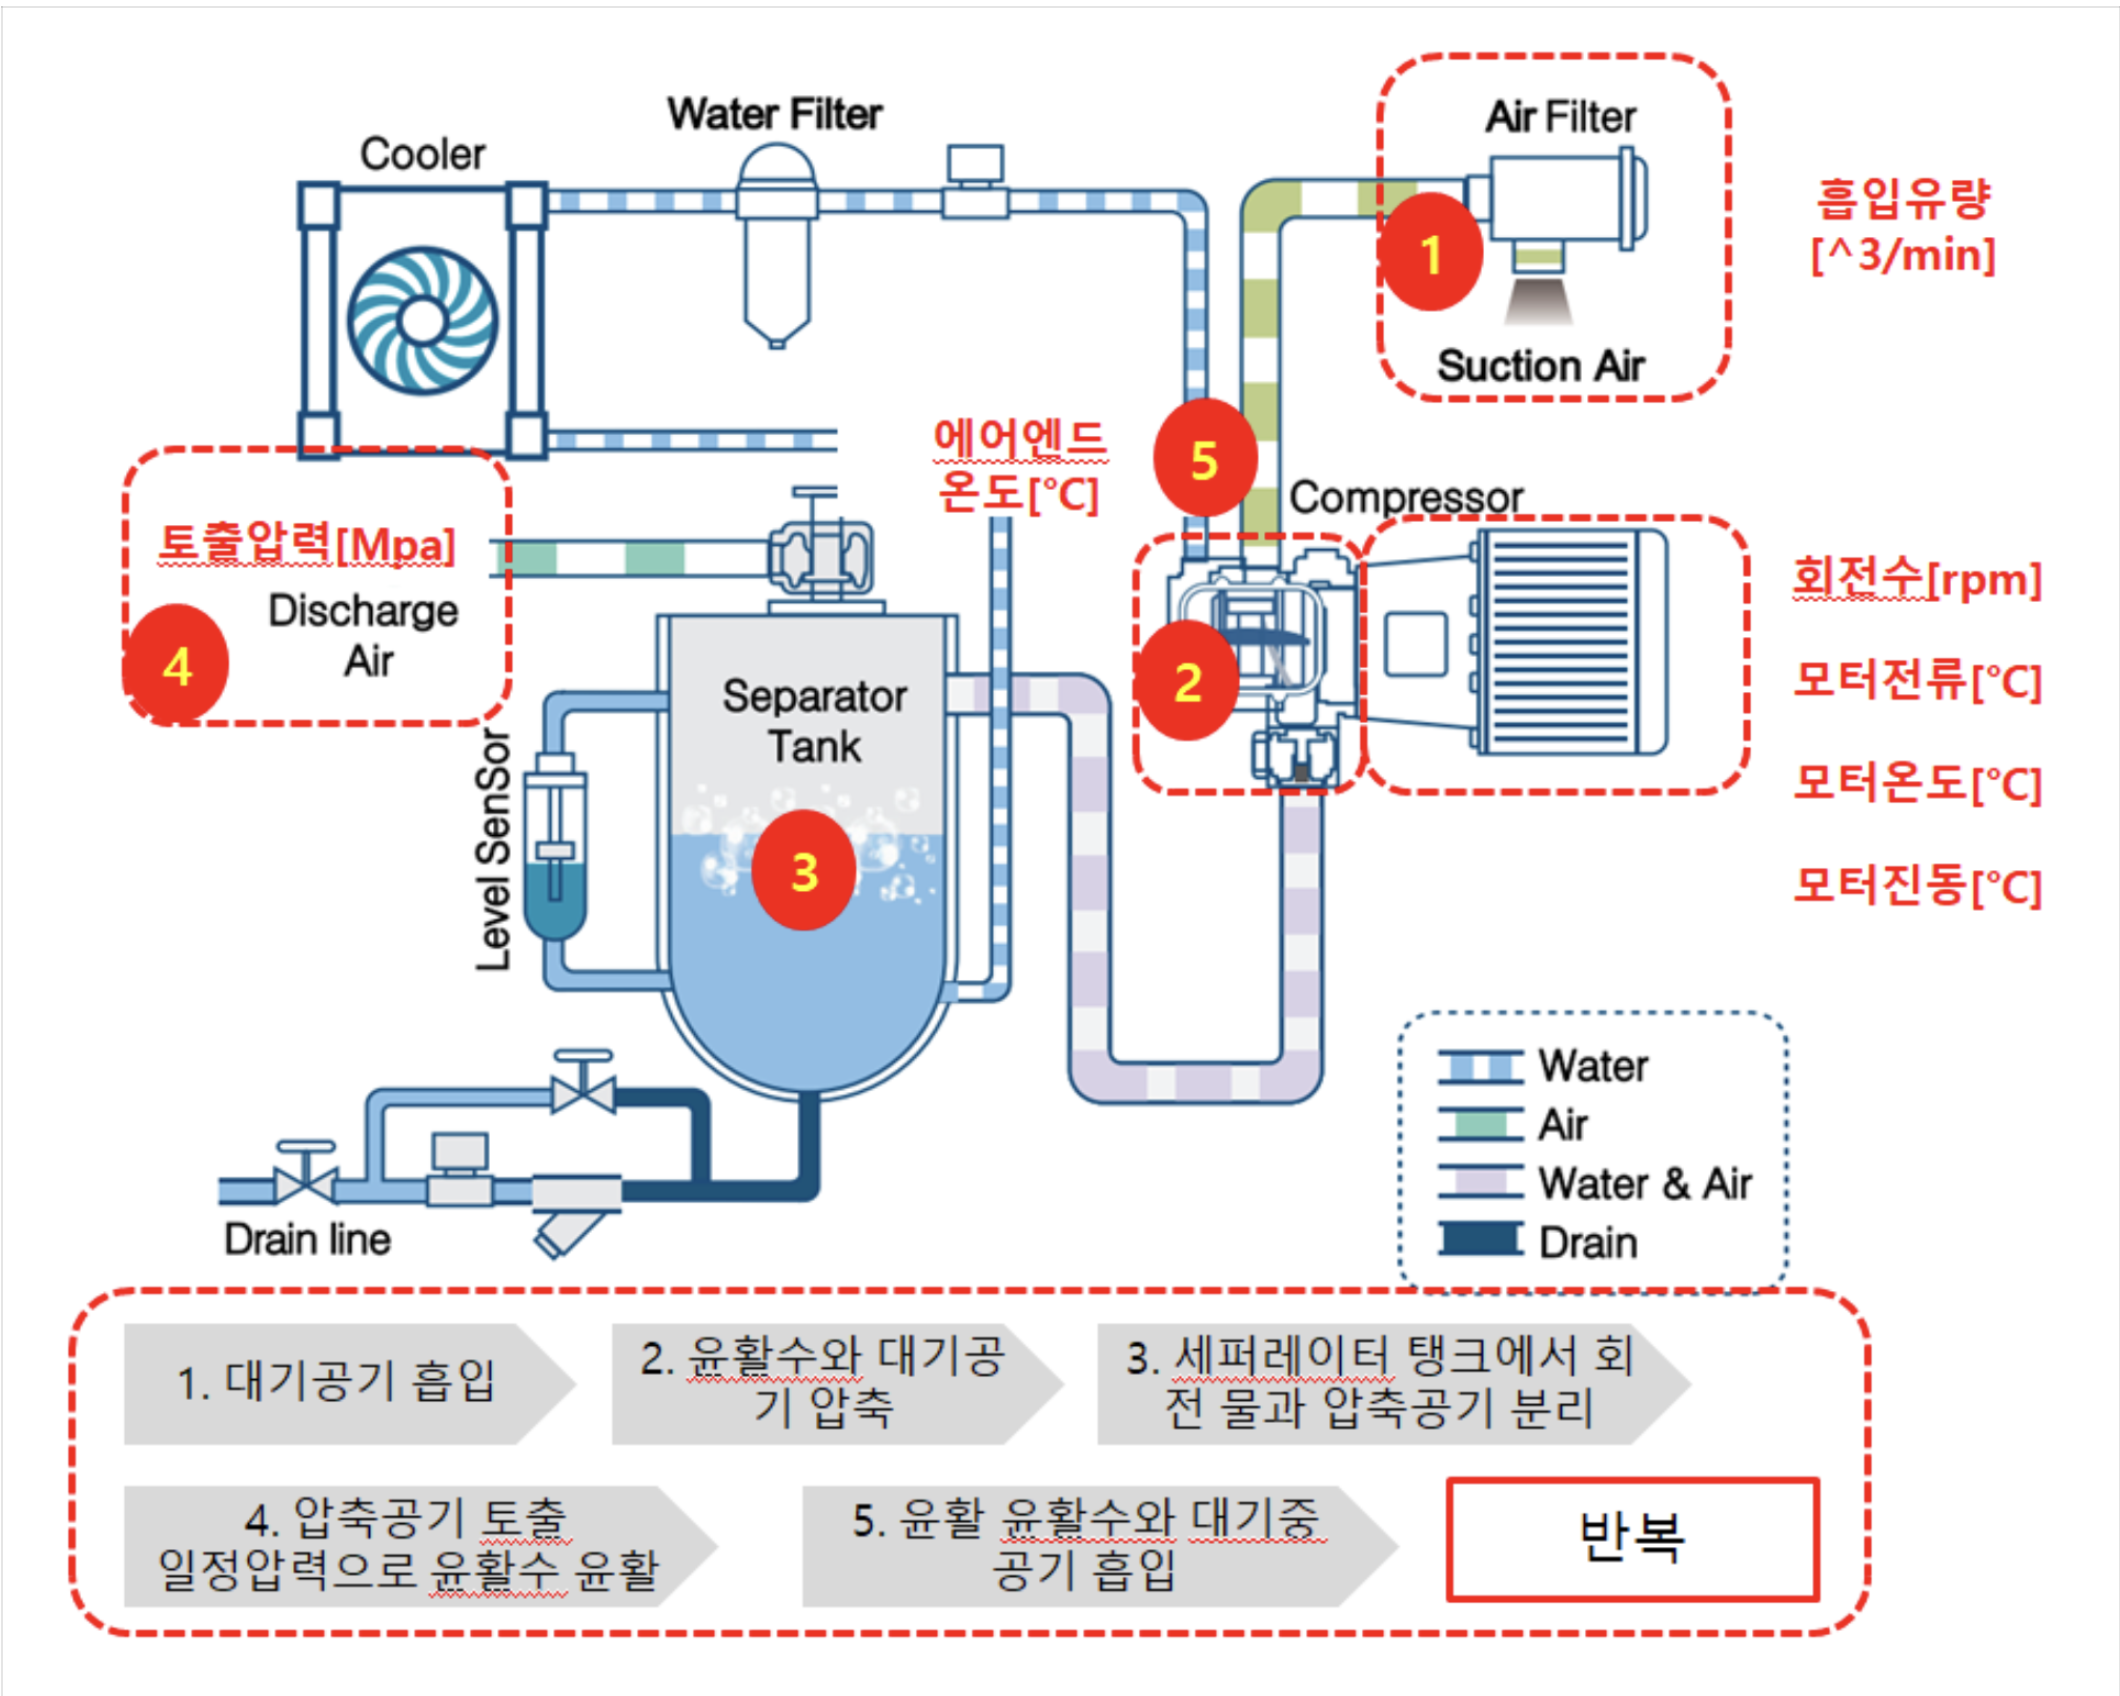

air_inflow	공기 흡 입유량	

air_end_temp	공기 말단 온도

out_pressure	토출 압력	

motor_current	모터 전류

moter_rpm	모터 회전수	

motor_temp	모터 온도

motor_vibe	모터 진동	


type	설비 번호

설비번호[0,4,5,6,7]- 30HP(마력)	

설비 번호 1 – 20HP	

설비 번호 2 – 10HP	

설비 번호 3 - 50HP


##PCA
PCA를 통해 많은 영향을 끼치는 컬럼을 알아볼 필요가 있음

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#scaling
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal)
scaled_normal = pd.DataFrame(normal_scaled)
scaled_normal

,0,1,2,3,4,5,6,7
0,-0.448257,-0.917212,-1.110223e-16,-0.511748,-1.007046,-0.910351,-0.331821,-1.326376
1,0.699749,1.178320,-1.110223e-16,0.802045,1.118785,1.172883,0.188462,-1.326376
2,-0.182053,-0.425427,-1.110223e-16,-0.202966,-0.508305,-0.421612,-0.211268,-1.326376
3,0.200616,0.266970,-1.110223e-16,0.230799,0.194005,0.265958,-0.039955,-1.326376
4,-0.190372,-0.434598,-1.110223e-16,-0.208848,-0.517029,-0.430592,-0.211268,-1.326376
...,...,...,...,...,...,...,...,...
2458,0.125746,0.137432,-1.110223e-16,0.149927,0.063140,0.137680,-0.071680,1.813115
2459,-0.073907,-0.236279,-1.110223e-16,-0.084600,-0.316369,-0.234326,-0.160509,1.813115
2460,-0.781013,-1.520194,-1.110223e-16,-0.889638,-1.619204,-1.510693,-0.477754,1.813115
2461,-0.764375,-1.490389,-1.110223e-16,-0.871259,-1.588669,-1.481189,-0.471409,1.813115


In [ ]:
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(scaled_normal)

# 주성분 중요도 확인
component_importance = pca2.explained_variance_ratio_

# 컬럼 중요도 출력
num_columns = scaled_normal.shape[1]
column_importance = {}
for i in range(num_columns):
    column_importance[normal.columns[i]] = sum(abs(pca2.components_[:, i]) * component_importance)

# 중요도가 큰 순서대로 정렬하여 출력
sorted_columns = sorted(column_importance.items(), key=lambda x: x[1], reverse=True)
for column, importance in sorted_columns:
    print(f"{column}: {importance}")

motor_rpm: 0.31343567528637717
air_end_temp: 0.3125839310264487
motor_temp: 0.3123833603498371
motor_current: 0.3042886515587745
air_inflow: 0.29879118677433036
type: 0.1579378824344171
motor_vibe: 0.13711671311760987
out_pressure: 1.7038871486494726e-17


###**결과해석**
####수치
motor_rpm: 0.3134

air_end_temp: 0.3126

motor_temp: 0.3124

motor_current: 0.3043

- motor_rpm이 가장 큰 중요도를 가진 컬럼으로, 데이터의 변동성을 크게 설명함
- 위 4개의 컬럼이 공기압축기에 큰 영향을 주는 컬럼이라고 판단할 수 있음

##데이터로 상관관계 확인
- 각 변수들의 단위가 다르므로 스케일링을 진행
> normal 데이터는 모두 정상수치이고, 각 컬럼 별 한계치를 알아야하기 때문에 **Standard scaling** 사용

- 이 기법의 특징은 변수 간의 상대적인 크기를 비교 가능하게 만들어줌
- 다른 스케일링 기법과 달리 이상치에 상대적으로 영향을 적게 받음
- 변수의 분포를 유지

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#data load
normal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/train_data.csv')
abnormal = pd.read_csv('/content/drive/MyDrive/AI SPARK 챌린지/dataset/test_data.csv')

#클러스터링은 연속형 변수만 가능
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal)
scaled_normal = pd.DataFrame(normal_scaled)  #변수 표준화
scaled_normal

,0,1,2,3,4,5,6,7
0,-0.448257,-0.917212,-1.110223e-16,-0.511748,-1.007046,-0.910351,-0.331821,-1.326376
1,0.699749,1.178320,-1.110223e-16,0.802045,1.118785,1.172883,0.188462,-1.326376
2,-0.182053,-0.425427,-1.110223e-16,-0.202966,-0.508305,-0.421612,-0.211268,-1.326376
3,0.200616,0.266970,-1.110223e-16,0.230799,0.194005,0.265958,-0.039955,-1.326376
4,-0.190372,-0.434598,-1.110223e-16,-0.208848,-0.517029,-0.430592,-0.211268,-1.326376
...,...,...,...,...,...,...,...,...
2458,0.125746,0.137432,-1.110223e-16,0.149927,0.063140,0.137680,-0.071680,1.813115
2459,-0.073907,-0.236279,-1.110223e-16,-0.084600,-0.316369,-0.234326,-0.160509,1.813115
2460,-0.781013,-1.520194,-1.110223e-16,-0.889638,-1.619204,-1.510693,-0.477754,1.813115
2461,-0.764375,-1.490389,-1.110223e-16,-0.871259,-1.588669,-1.481189,-0.471409,1.813115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

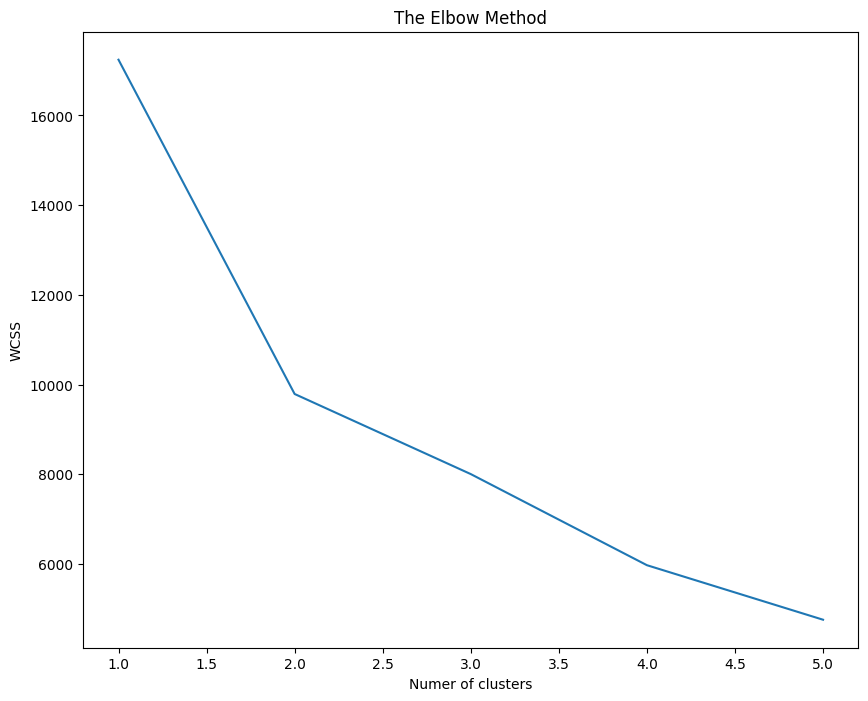

In [ ]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,6):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(scaled_normal)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
#최적의 k-means 값은 '2'이다
#sclaed된 데이터를 넣어 스케일링

kmeans = KMeans(n_clusters = 2, random_state = 42)
clusters = kmeans.fit(scaled_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#clustering 변수인 clusters를 원본데이터에 넣기
normal['cluster'] = clusters.labels_

###clusters를 원본 데이터에 추가하는 이유
 * 각 데이터 포인트가 어떤 클러스터에 속하는지 확인할 수 있음
 * 해당 클러스터에 속한 데이터의 특성이나 통계 정보를 쉽게 추출 가능함
 * 이를 통해 시각화로 데이터의 패턴과 클러스터 간의 관계를 살펴볼 수 있음



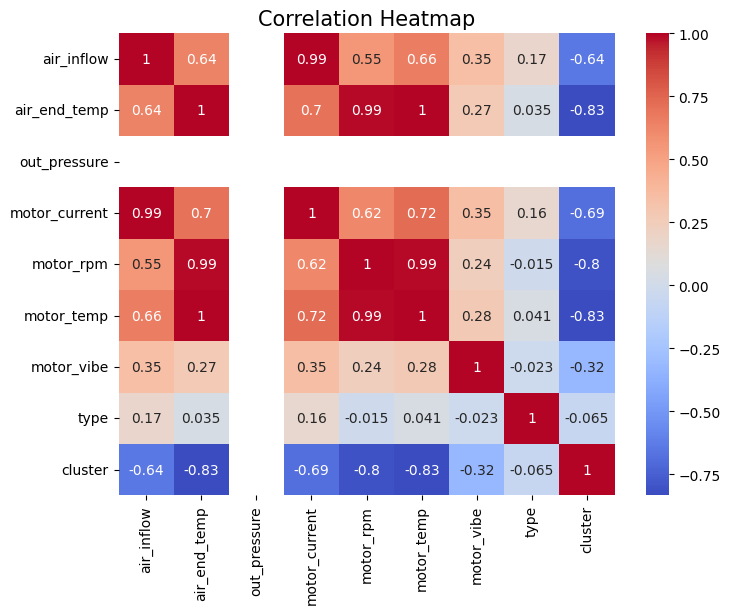

In [ ]:
#클러스터링은 연속형 변수만 가능
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal)
scaled_normal = pd.DataFrame(normal_scaled)  #변수 표준화
scaled_normal#normal data visualization

#Heatmap으로 상관관계 및 계수 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(normal.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [ ]:
#클러스터링은 연속형 변수만 가능
scaler = StandardScaler()
abnormal_scaled = scaler.fit_transform(abnormal)
scaled_abnormal = pd.DataFrame(abnormal_scaled)  #변수 표준화
scaled_abnormal

,0,1,2,3,4,5,6,7
0,0.349570,0.487848,0.029701,0.387062,0.419055,0.491978,0.208765,-1.326376
1,0.478445,0.713509,0.029701,0.531396,0.647355,0.716757,0.348482,-1.326376
2,-0.329171,-0.725652,0.029701,-0.392040,-0.806787,-0.718468,-0.520873,-1.326376
3,0.083228,0.012350,0.029701,0.081769,-0.060812,0.017876,-0.070671,-1.326376
4,-0.037055,-0.202949,0.029701,-0.056520,-0.278934,-0.197860,-0.210389,-1.326376
...,...,...,...,...,...,...,...,...
7384,0.014495,-0.110842,0.029701,0.002423,-0.185868,-0.104848,-0.148292,1.813115
7385,-0.535371,-1.083715,0.029701,-0.621765,-1.168869,-1.076305,-0.738212,1.813115
7386,-0.466638,-0.970885,0.029701,-0.549220,-1.053991,-0.962624,-0.660591,1.813115
7387,-0.440863,-0.927134,0.029701,-0.521260,-1.010367,-0.918702,-0.645066,1.813115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

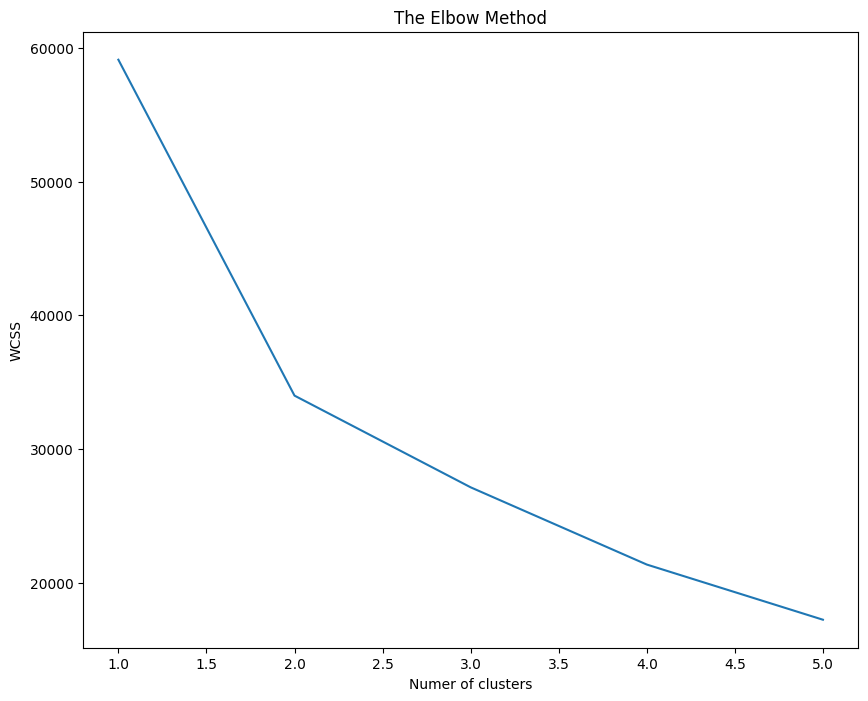

In [ ]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,6):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(scaled_abnormal)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
#abnormal 또한 최적의 k-means 값은 '2'이다
#sclaed된 데이터를 넣어 스케일링

kmeans = KMeans(n_clusters = 2, random_state = 42)
clusters = kmeans.fit(scaled_abnormal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#clustering 변수인 clusters를 원본데이터에 넣기
abnormal['cluster'] = clusters.labels_

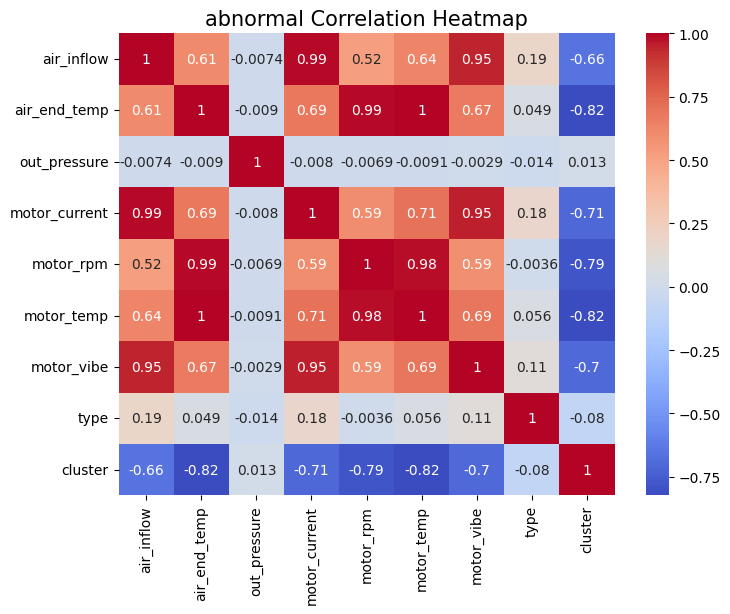

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(abnormal.corr(), annot=True, cmap='coolwarm')
plt.title('abnormal Correlation Heatmap', fontsize=15)
plt.show()

##normal 양의 상관관계(양의 선형 관계)
0.99
 * air inflow - motor current
 * motor rpm - air end temp
 * motor rpm - motor temp



 

##abnormal 양의 상관관계(양의 선형 관계)
(0.99-0.95)
 * air inflow - motor current
 * motor rpm - air end temp
 * motor rpm - motor temp

 ### (abnormal에만 나타는 상관계수)
 
 * air inflow - motor vibe
 * motor rpm - motor vibe 


##도메인 지식(공기압축기 기계 알고리즘)
1. 대기 공기 흡입 (air_inflow)

2. 윤활수와 대기공기 압축 (motor_rpm, motor,current,  motor_temp,  motor_vibe)

3. 세퍼레이터 탱크에서 회전 물과 압축공기 분리

4. 압축공기 토출 일정 압력으로 윤활수 윤활 (out_pressure)

5. 윤활 윤활수와 대기중 공기 흡입 (air_end
_temp)

In [ ]:
'''
no_0 = normal[normal['type'] == 0].copy()
no_1 = normal[normal['type'] == 1].copy()
no_2 = normal[normal['type'] == 2].copy()
no_3 = normal[normal['type'] == 3].copy()
no_4 = normal[normal['type'] == 4].copy()
no_5 = normal[normal['type'] == 5].copy()
no_6 = normal[normal['type'] == 6].copy()
no_7 = normal[normal['type'] == 7].copy()

ab_0 = abnormal[abnormal['type'] == 0].copy()
ab_1 = abnormal[abnormal['type'] == 1].copy()
ab_2 = abnormal[abnormal['type'] == 2].copy()
ab_3 = abnormal[abnormal['type'] == 3].copy()
ab_4 = abnormal[abnormal['type'] == 4].copy()
ab_5 = abnormal[abnormal['type'] == 5].copy()
ab_6 = abnormal[abnormal['type'] == 6].copy()
ab_7 = abnormal[abnormal['type'] == 7].copy()
'''…

#efficient code
#normal
nor_dict={}
nor = {}
for i in range(8):
  nor_dict[i] = normal[normal['type'] == i].iloc[:,:-1]
  nor[i] = nor_dict[i]

#abnormal
ab_dict={}
ab = {}
for i in range(8):
  ab_dict[i] = abnormal[abnormal['type'] == i].iloc[:,:-1]
  ab[i] = ab_dict[i]

In [ ]:
nor[1].head()

#complete!

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
432,1.73,55.16,0.7,25.60,2973.0,71.03,3.45,1
433,1.31,46.05,0.7,19.32,2244.0,62.93,3.05,1
434,1.33,46.59,0.7,19.69,2287.0,63.41,3.07,1
435,1.87,58.00,0.7,27.56,3200.0,73.56,3.58,1
436,1.68,53.98,0.7,24.78,2878.0,69.98,3.40,1


In [ ]:
ab[i].head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
6831,3.09,60.96,0.7,40.05,3277.0,76.41,3.82
6832,2.09,47.68,0.7,27.06,2214.0,64.60,3.23
6833,1.36,37.98,0.7,17.58,1438.0,55.98,2.80
6834,1.92,45.36,0.7,24.80,2029.0,62.54,3.13
6835,3.32,63.89,0.7,42.91,3511.0,79.01,3.95


In [ ]:
# 정상치 데이터 평균
nor_means = {}
for i in range(8):
    nor_means[i] = nor[i].mean()

# 이상치 데이터 평균
ab_means = {}
for i in range(8):
    ab_means[i] = ab[i].mean()


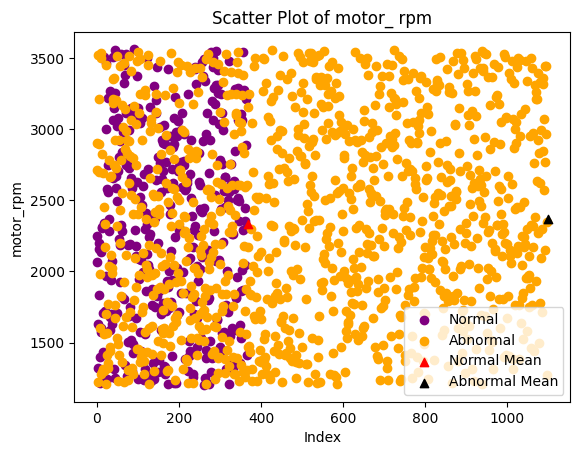

In [ ]:
#type별 시각화

plt.scatter(range(len(nor[2]['motor_rpm'])), nor[2]['motor_rpm'], color='purple', label='Normal')
plt.scatter(range(len(ab[2]['motor_rpm'])), ab[2]['motor_rpm'], color='orange', label='Abnormal')
plt.xlabel('Index')
plt.ylabel('motor_rpm')
plt.title('Scatter Plot of motor_ rpm')
plt.legend()

# 평균값 계산
nor_mean = nor[2]['motor_rpm'].mean()
ab_mean = ab[2]['motor_rpm'].mean()

# 평균값 표시
plt.scatter(len(nor[2]['motor_rpm']) + 1, nor_mean, marker='^', color='red', label='Normal Mean')
plt.scatter(len(ab[2]['motor_rpm']) + 1, ab_mean, marker='^', color='black', label='Abnormal Mean')

plt.legend()
plt.show()

In [ ]:
color_map = {0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray'}

#motor_rpm - air_end_temp

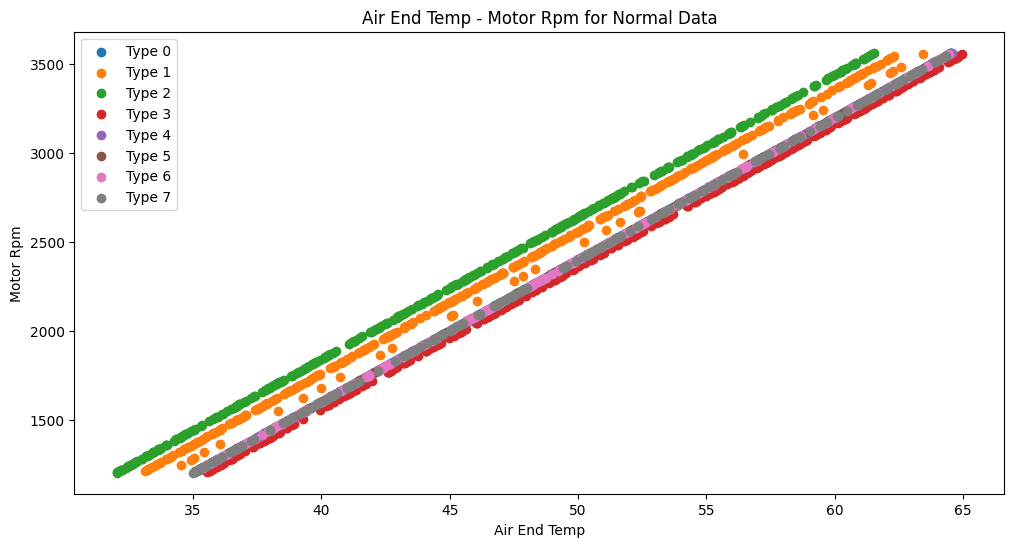

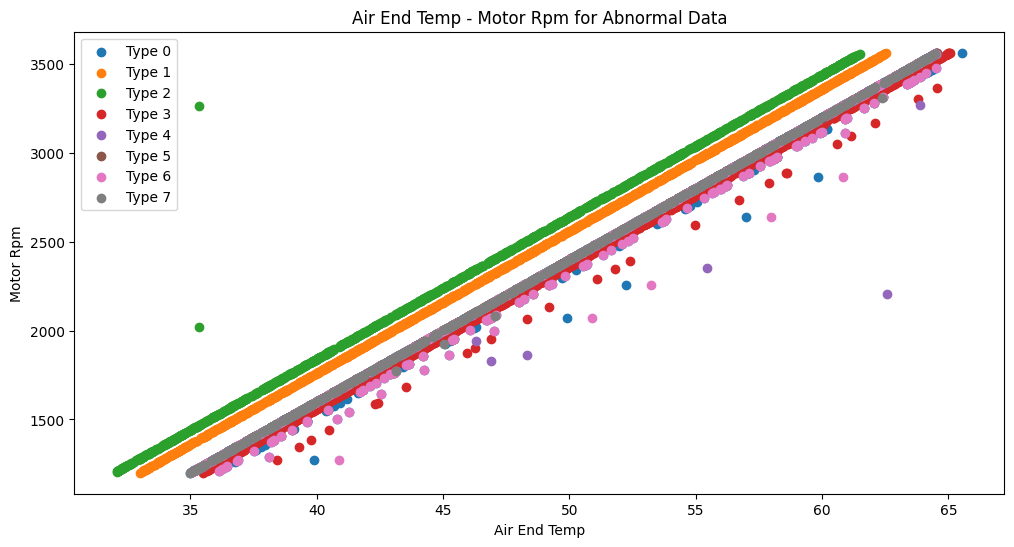

In [ ]:
normal_grouped_data = normal.groupby('type')

abnormal_grouped_data = abnormal.groupby('type')

plt.figure(figsize=(12, 6))

for name, group in normal_grouped_data:
    plt.scatter(group['air_end_temp'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Air End Temp')
plt.ylabel('Motor Rpm')
plt.title('Air End Temp - Motor Rpm for Normal Data')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

for name, group in abnormal_grouped_data:
    plt.scatter(group['air_end_temp'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Air End Temp')
plt.ylabel('Motor Rpm')
plt.title('Air End Temp - Motor Rpm for Abnormal Data')
plt.legend()
plt.show()

type0 ,type3, type4, type6 

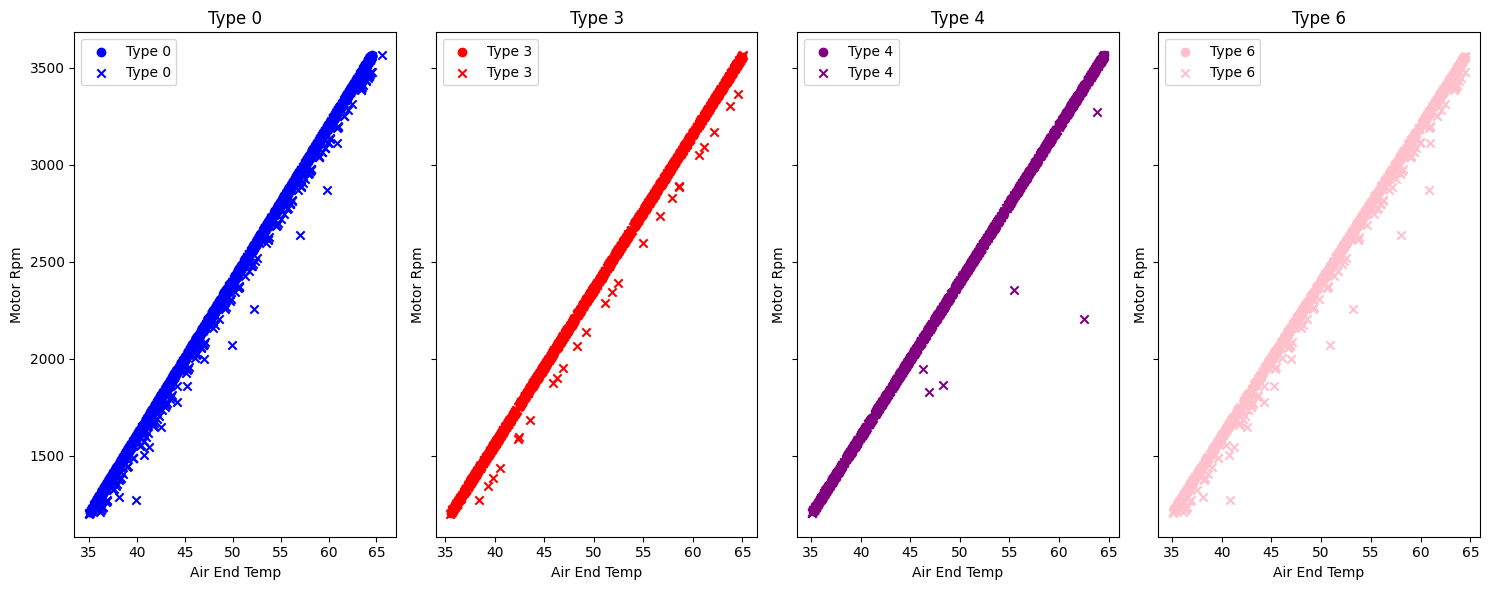

In [ ]:
types_to_visualize = [0, 3, 4, 6]

num_types = len(types_to_visualize)

fig, axes = plt.subplots(1, num_types, figsize=(15, 6), sharey=True)


for i, type_to_visualize in enumerate(types_to_visualize):

    group = normal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['air_end_temp'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize])


    group = abnormal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['air_end_temp'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize], marker='x')

    axes[i].set_xlabel('Air End Temp')
    axes[i].set_ylabel('Motor Rpm')
    axes[i].set_title('Type {}'.format(type_to_visualize))
    axes[i].legend()

plt.tight_layout()


plt.show()

타입별로 확인한 이유: 겹치는 부분이 있는데 그 부분을 눈으로 보이는 것이 아닌 정확한 근거를 찾기위함

#motor_rpm - motor_temp

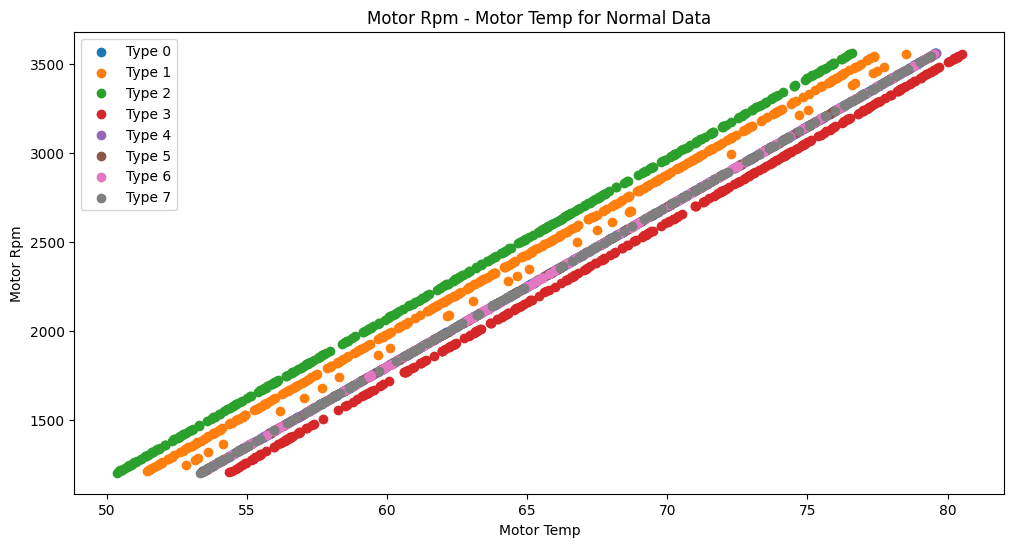

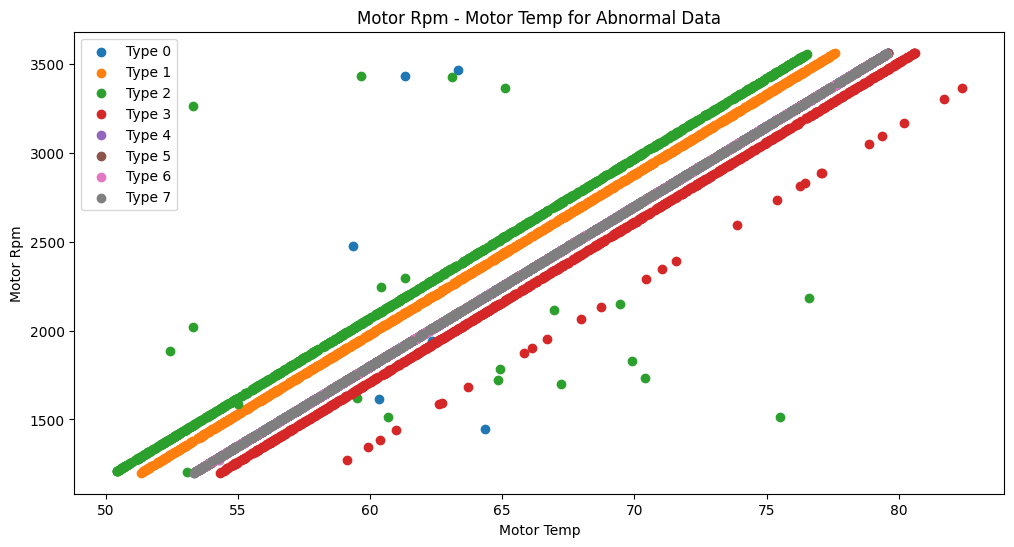

In [ ]:
normal_grouped_data = normal.groupby('type')

abnormal_grouped_data = abnormal.groupby('type')

plt.figure(figsize=(12, 6))

for name, group in normal_grouped_data:
    plt.scatter(group['motor_temp'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Motor Temp')
plt.ylabel('Motor Rpm')
plt.title('Motor Rpm - Motor Temp for Normal Data')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))

for name, group in abnormal_grouped_data:
    plt.scatter(group['motor_temp'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Motor Temp')
plt.ylabel('Motor Rpm')
plt.title('Motor Rpm - Motor Temp for Abnormal Data')
plt.legend()
plt.show()

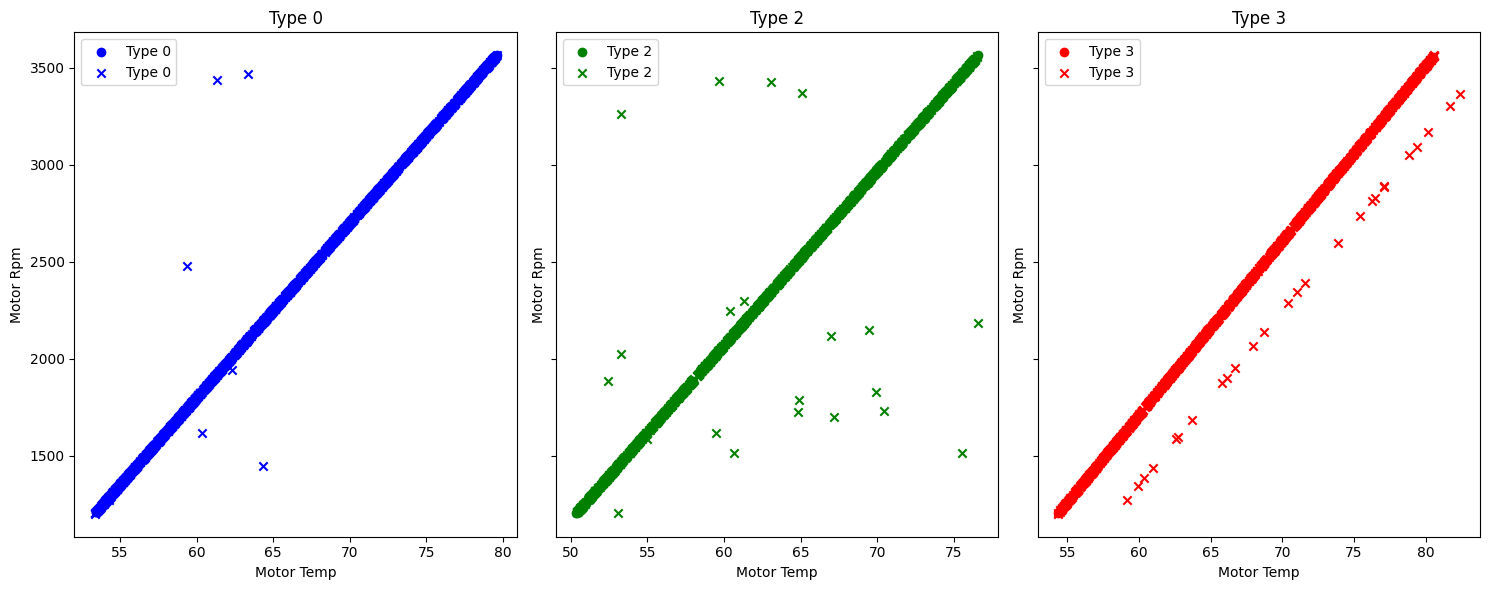

In [ ]:
types_to_visualize = [0, 2, 3]


num_types = len(types_to_visualize)


fig, axes = plt.subplots(1, num_types, figsize=(15, 6), sharey=True)


for i, type_to_visualize in enumerate(types_to_visualize):
    
    group = normal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['motor_temp'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize])

    
    group = abnormal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['motor_temp'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize], marker='x')

    axes[i].set_xlabel('Motor Temp')
    axes[i].set_ylabel('Motor Rpm')
    axes[i].set_title('Type {}'.format(type_to_visualize))
    axes[i].legend()


plt.tight_layout()


plt.show()

#motor_rpm - motor_vibe

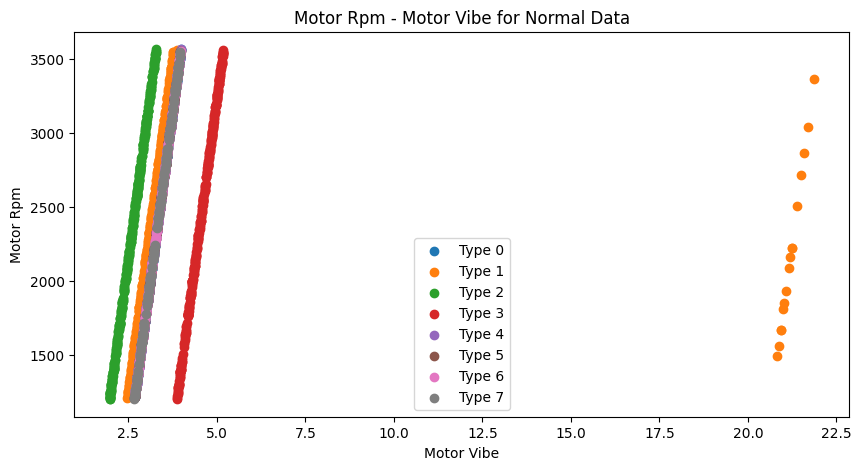

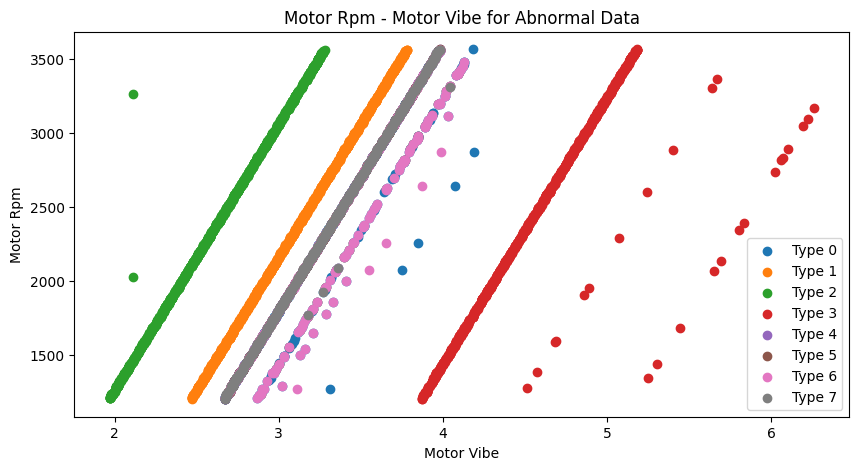

In [ ]:
normal_grouped_data = normal.groupby('type')

abnormal_grouped_data = abnormal.groupby('type')

plt.figure(figsize=(10, 5))

for name, group in normal_grouped_data:
    plt.scatter(group['motor_vibe'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Motor Vibe')
plt.ylabel('Motor Rpm')
plt.title('Motor Rpm - Motor Vibe for Normal Data')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))

for name, group in abnormal_grouped_data:
    plt.scatter(group['motor_vibe'], group['motor_rpm'], label='Type {}'.format(name))

plt.xlabel('Motor Vibe')
plt.ylabel('Motor Rpm')
plt.title('Motor Rpm - Motor Vibe for Abnormal Data')
plt.legend()
plt.show()

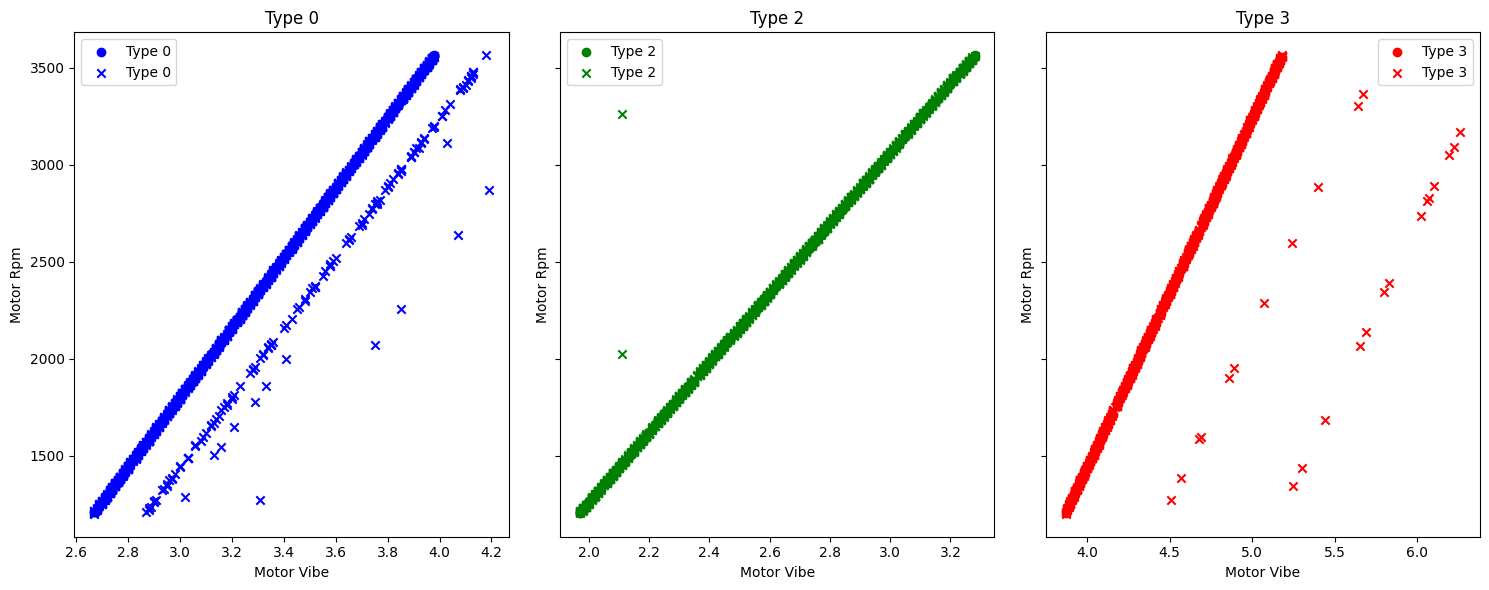

In [ ]:
types_to_visualize = [0, 2, 3]

num_types = len(types_to_visualize)

fig, axes = plt.subplots(1, num_types, figsize=(15, 6), sharey=True)

for i, type_to_visualize in enumerate(types_to_visualize):

    group = normal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['motor_vibe'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize])

    
    group = abnormal_grouped_data.get_group(type_to_visualize)
    axes[i].scatter(group['motor_vibe'], group['motor_rpm'], label='Type {}'.format(type_to_visualize), color=color_map[type_to_visualize], marker='x')

    axes[i].set_xlabel('Motor Vibe')
    axes[i].set_ylabel('Motor Rpm')
    axes[i].set_title('Type {}'.format(type_to_visualize))
    axes[i].legend()


plt.tight_layout()


plt.show()

#Clustering

RobustScaler:

이상치에 강한 통계량을 사용하여 스케일링을 수행합니다.

중앙값과 사분위 범위를 사용합니다.

이상치를 잘 다루기 때문에 평균과 표준 편차 대신 백분위수를 사용합니다.

데이터에 이상치가 포함되어 있거나 가우시안 분포를 따르지 않는 경우에 적합합니다.

데이터에 이상치가 포함되어 있거나 정규 분포를 따르지 않는 경우에는 일반적으로 RobustScaler가 더 좋은 선택입니다. 

( 데이터가 정규 분포를 따르고 이상치가 걱정되지 않는 경우에는 StandardScaler가 적합할 수 있습니다.)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
normal_scaled = scaler.fit_transform(normal)
scaled_normal = pd.DataFrame(normal_scaled, columns=normal.columns)


scaled_normal

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,-0.240260,-0.540834,0.0,-0.281630,-0.571429,-0.531048,-0.388235,-0.75
1,0.655844,0.698068,0.0,0.664373,0.660767,0.706286,0.576471,-0.75
2,-0.032468,-0.250085,0.0,-0.059291,-0.282343,-0.240762,-0.164706,-0.75
3,0.266234,0.159268,0.0,0.253044,0.124737,0.167619,0.152941,-0.75
4,-0.038961,-0.255507,0.0,-0.063526,-0.287400,-0.246095,-0.164706,-0.75
...,...,...,...,...,...,...,...,...
2458,0.207792,0.082684,0.0,0.194812,0.048883,0.091429,0.094118,1.00
2459,0.051948,-0.138258,0.0,0.025940,-0.171091,-0.129524,-0.070588,1.00
2460,-0.500000,-0.897323,0.0,-0.553732,-0.926254,-0.887619,-0.658824,1.00
2461,-0.487013,-0.879702,0.0,-0.540498,-0.908555,-0.870095,-0.647059,1.00


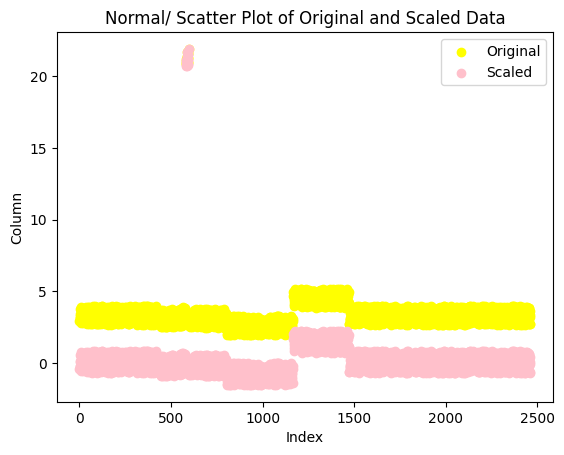

In [ ]:
import matplotlib.pyplot as plt

# 원본 데이터와 스케일링된 데이터의 산점도 시각화
plt.scatter(range(len(normal['motor_vibe'])), normal['motor_vibe'], color='yellow', label='Original')
plt.scatter(range(len(scaled_normal['motor_vibe'])), scaled_normal['motor_vibe'], color='pink', label='Scaled')
plt.xlabel('Index')
plt.ylabel('Column')
plt.title('Normal/ Scatter Plot of Original and Scaled Data')
plt.legend()
plt.show()


In [ ]:
#abnormal
scaler = RobustScaler()
abnormal_scaled = scaler.fit_transform(abnormal)
scaled_abnormal = pd.DataFrame(abnormal_scaled, columns=abnormal.columns)


scaled_abnormal

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,0.382550,0.299934,0.0,0.341372,0.256260,0.304576,0.261905,-0.75
1,0.483221,0.429993,0.0,0.443730,0.387312,0.435109,0.369048,-0.75
2,-0.147651,-0.399469,0.0,-0.211147,-0.447412,-0.398350,-0.297619,-0.75
3,0.174497,0.025879,0.0,0.124866,-0.019199,0.029257,0.047619,-0.75
4,0.080537,-0.098208,0.0,0.026795,-0.144407,-0.096024,-0.059524,-0.75
...,...,...,...,...,...,...,...,...
7384,0.120805,-0.045123,0.0,0.068596,-0.090985,-0.042011,-0.011905,1.00
7385,-0.308725,-0.605839,0.0,-0.374062,-0.655259,-0.606152,-0.464286,1.00
7386,-0.255034,-0.540810,0.0,-0.322615,-0.589316,-0.540135,-0.404762,1.00
7387,-0.234899,-0.515594,0.0,-0.302787,-0.564274,-0.514629,-0.392857,1.00


- 본 데이터는 레이블이 없어 비지도학습이 필요함
- 따라서, 클러스터링을 통한 데이터의 패턴 혹은 분포를 확인할 필요가 있음

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# 입력 변수 (X) 추출
X = scaled_abnormal.iloc[:, :-1]

# 실루엣 점수 계산 함수
def calculate_silhouette_score(model, X):
    labels = model.labels_
    return silhouette_score(X, labels)

# k-평균 (K-means) 군집화
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans_score = calculate_silhouette_score(kmeans, X)

# 병합 군집 (Agglomerative Clustering)
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
agg_score = calculate_silhouette_score(agg, X)

# DBSCAN 군집화
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
dbscan_score = calculate_silhouette_score(dbscan, X)

# LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(X)
lof_score = silhouette_score(X, -lof.negative_outlier_factor_)

# Isolation Forest
isolation_forest = IsolationForest(random_state=0)
isolation_forest.fit(X)
isolation_forest_score = silhouette_score(X, -isolation_forest.decision_function(X))






# 결과 비교
print('K-means 실루엣 점수:', kmeans_score)
print('병합 군집 실루엣 점수:', agg_score)
print('DBSCAN 실루엣 점수:', dbscan_score)
print("LOF 실루엣 점수:", lof_score)
print("Isolation Forest 실루엣 점수:", isolation_forest_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means 실루엣 점수: 0.4744909529676301
병합 군집 실루엣 점수: 0.45968661596742993
DBSCAN 실루엣 점수: 0.2006168309834159
LOF 실루엣 점수: 0.6106861110533874
Isolation Forest 실루엣 점수: 0.4848916729076357


LOF 실루엣 점수는 0.610XXX로 상당히 높은 편입니다. 

이는 LOF가 데이터를 상대적으로 잘 구분하여 군집화한 것을 의미합니다